In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Evaluating a model

by visualizing
* the data
* the model
* the training
* the predictions

In [2]:
# Make a bigger dataset
X =  tf.range(-100, 100, 4)
# Make lables
y = X + 10

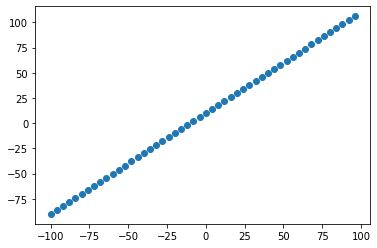

In [3]:
plt.scatter(X,y)

#### split data into a train (70% -80%), (validation (10% to 15%) can be dropped) and a test (10% - 15%) set

In [4]:
# check the length of the dataset
len(X)

50

In [5]:
# split the data in train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

In [6]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

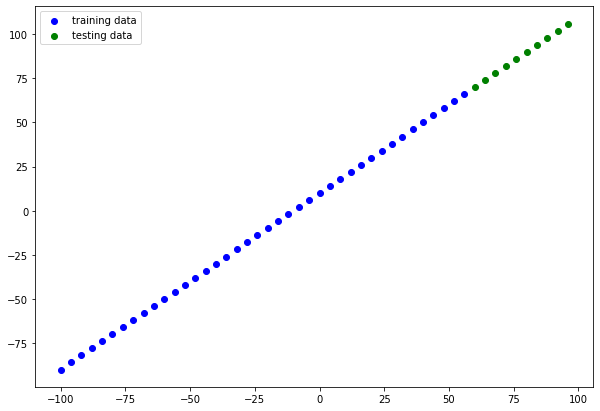

In [7]:
###visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color='b', label='training data')
plt.scatter(X_test, y_test, color='g', label = 'testing data')
plt.legend();

Visualizing the model

In [8]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer') # input shape: one input for one output
], name='model_001')

model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

In [10]:
model.summary()

Model: "model_001"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number parameters in the model
* trainable parameters - these can be updated during training
* non-trainable parametes - these can't be updated during training (see transfer learning)

(see MIT's introduction to deep learning)

In [11]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [12]:
model.summary()

Model: "model_001"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.utils import plot_model

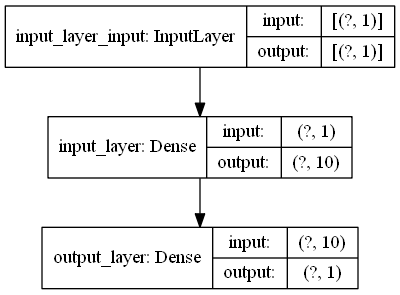

In [14]:
plot_model(model, show_shapes=True)

### Visualizing our model's prediction

In [15]:
y_pred = model.predict(X_test)

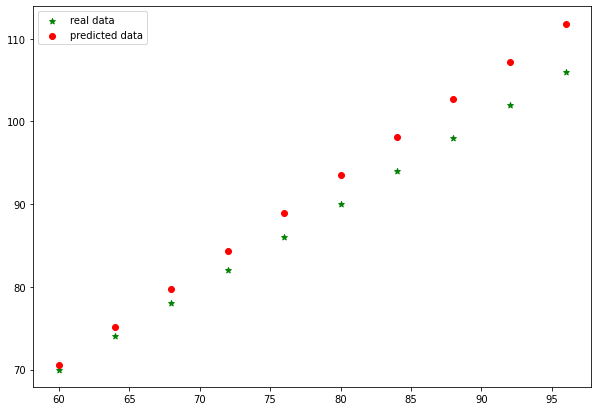

In [16]:
plt.figure(figsize=(10,7))

plt.scatter(X_test, y_test, c='g', marker ='*', label = 'real data' )
plt.scatter(X_test, y_pred, c='r', marker ='o', label = 'predicted data')
plt.legend()

In [17]:
def plot_prediction(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   predictions = y_pred):
    '''plots training data, test data and compares to ground truth
    '''
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b',marker ='.', label='training data')
    plt.scatter(test_data, test_labels, c='g', marker='x' ,label ='testing data')
    plt.scatter(X_test, y_pred, c='r', marker ='o', label = 'predicted data')
    plt.legend()
    print('MAE: ' + str(tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_pred))).numpy()))
    print('MSE: ' + str(tf.metrics.mean_squared_error(y_test, tf.squeeze(tf.constant(y_pred))).numpy()))

MAE: 3.19694
MSE: 13.070127


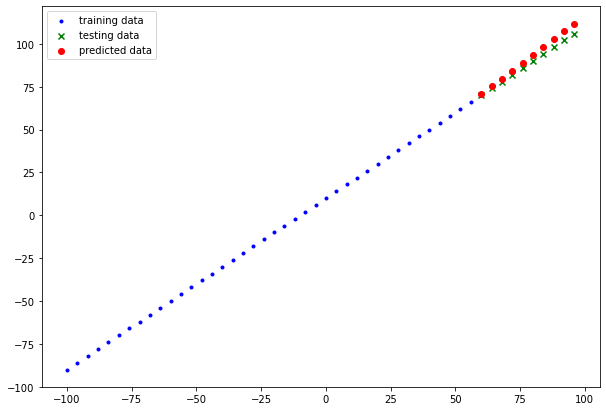

In [18]:
plot_prediction(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   predictions = y_pred) # arguments are optional, since they are set as default

### Regression evaluation metrics

* MAE - mean absolute error
* MSE - mean square error (bias towards outliers)

In [19]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1000us/step - loss: 3.1969 - mae: 3.1969


[3.196941375732422, 3.196941375732422]

In [20]:
# calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253971 , 23.84169  ],
      dtype=float32)>

In [21]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [22]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253971 , 23.84169  ],
      dtype=float32)>

In [23]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**tensors have to have the same shape!**

In [24]:
y_pred = tf.squeeze(y_pred)

In [25]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [26]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [27]:
h = tf.keras.losses.Huber(delta = 1)
h(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7069669>